In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('VehicleData.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


##Finding the shape of the dataframe

In [4]:
df.shape

(432, 15)

##Check for any null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


The shape shows we have **432** records while the info() function shows values **428** and **426** which means our dataset has some null values that need to be handled

In [7]:
df.isnull().sum()

,0
Make,4
Model,4
Type,4
Origin,4
DriveTrain,4
MSRP,4
Invoice,4
EngineSize,4
Cylinders,6
Horsepower,4


This further confirms the presence of null values in our dataset

###lets fill the null values using average value of those columns

In [9]:
df['Cylinders'].fillna(df['Cylinders'].mean , inplace = True)

<ipython-input-9-bb56a1690b6f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0      6.0
1      4.0
2      4.0
3      6.0
4      6.0
      ... 
427    5.0
428    5.0
429    6.0
430    4.0
431    5.0
Name: Cylinders, Length: 432, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Cylinders'].fillna(df['Cylinders'].mean , inplace = True)


In [10]:
df.isnull().sum()

,0
Make,4
Model,4
Type,4
Origin,4
DriveTrain,4
MSRP,4
Invoice,4
EngineSize,4
Cylinders,0
Horsepower,4


In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

,0
Make,0
Model,0
Type,0
Origin,0
DriveTrain,0
MSRP,0
Invoice,0
EngineSize,0
Cylinders,0
Horsepower,0


Now our dataframe has 0 null values and we can perform our analysis accurately

##Find the different type of Makes and count their occurances

Find the unique makes in our dataset

In [21]:
df['Make'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

Find the occurance of each unique make in the dataset

In [23]:
df['Make'].value_counts()

,count
Make,
Toyota,28
Chevrolet,27
Mercedes-Benz,26
Ford,23
BMW,20
Audi,19
Honda,17
Nissan,17
Volkswagen,15


<Axes: xlabel='Make', ylabel='Occurance'>

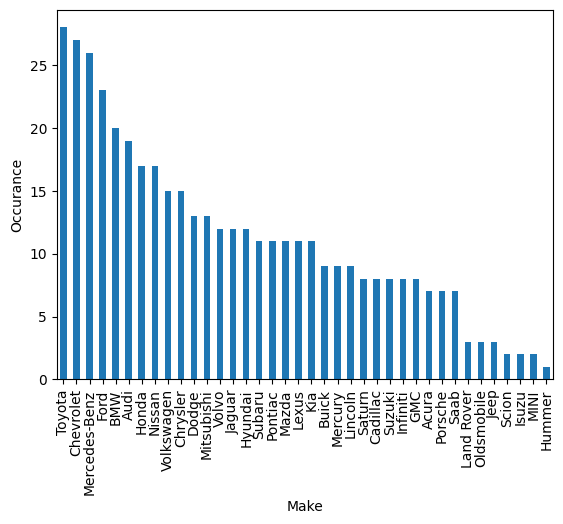

In [26]:
df['Make'].value_counts().plot(
    kind ='bar',
    xlabel = 'Make',
    ylabel = 'Occurance',

)

##Top 5 popular brands

In [27]:
top5_brands = df['Make'].value_counts().head()
top5_brands

,count
Make,
Toyota,28
Chevrolet,27
Mercedes-Benz,26
Ford,23
BMW,20


<BarContainer object of 5 artists>

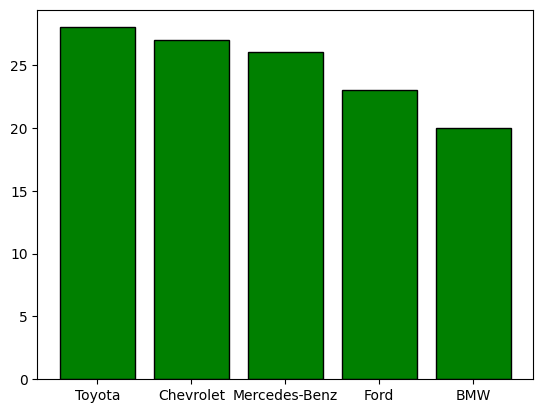

In [29]:
plt.bar(
    top5_brands.index,
    top5_brands.values,
    color = 'green',
    edgecolor = 'black',

)

##Find vehicles with origin either Asia or Europe

In [30]:
df[(df['Origin'] == 'Asia') | (df['Origin']=='Europe')]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


##Removing records of vehicles with weight > 4000

In [31]:
df = df[df['Weight'] < 4000]
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225.0,18.0,24.0,3893.0,115.0,197.0


In [33]:
df['Weight'].max()

3992.0

##Increase the value of MPG_CITY by 3



In [34]:
df['MPG_City'] = df['MPG_City'].apply(lambda x:x+3)
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,27.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,25.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,23.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,21.0,24.0,3880.0,115.0,197.0
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225.0,21.0,24.0,3893.0,115.0,197.0


##Max price vehicle

In [40]:
df[df['MSRP'] == df['MSRP'].max()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290.0,20.0,24.0,3153.0,100.0,174.0


##Vehicle with Max Horse Power

In [41]:
df[df['Horsepower'] == df['Horsepower'].max()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
116,Dodge,Viper SRT-10 convertible 2dr,Sports,USA,Rear,"$81,795","$74,451",8.3,10.0,500.0,15.0,20.0,3410.0,99.0,176.0


##Vehicle with Highest MPG in city

In [42]:
df[df['MPG_City'] == df['MPG_City'].max()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
152,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,"$19,110","$17,911",2.0,3.0,73.0,63.0,66.0,1850.0,95.0,155.0


##Vehicle with the lowest price

In [43]:
df[df['MSRP'] == df['MSRP'].min()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
210,Kia,Rio 4dr manual,Sedan,Asia,Front,"$10,280","$9,875",1.6,4.0,104.0,29.0,33.0,2403.0,95.0,167.0


##Vehicle with the lowest Horse Power

In [44]:
df[df['Horsepower'] == df['Horsepower'].min()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
152,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,"$19,110","$17,911",2.0,3.0,73.0,63.0,66.0,1850.0,95.0,155.0


##Vehicle with lowest MPG in city

In [46]:
df[df['MPG_City'] == df['MPG_City'].min()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
116,Dodge,Viper SRT-10 convertible 2dr,Sports,USA,Rear,"$81,795","$74,451",8.3,10.0,500.0,15.0,20.0,3410.0,99.0,176.0


##Average Vehicle Price for each brand

In [49]:
df['MSRP'] = df['MSRP'].str.replace('$','').str.replace(',','').astype(float)

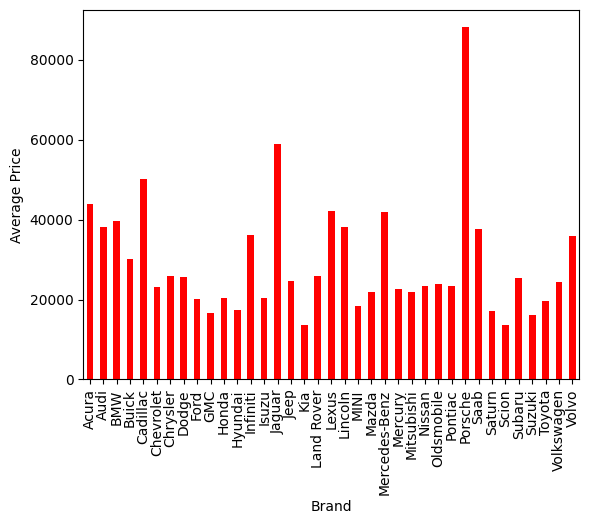

In [54]:
df.groupby('Make')['MSRP'].mean().plot(
    kind = 'bar',
    xlabel = 'Brand',
    ylabel = 'Average Price',
    color = 'Red'
);